In [1]:
import numpy
import scipy.stats
import scipy.signal
import matplotlib.pyplot as plt

# data from: https://www.itl.nist.gov/div898/handbook/eda/section4/eda4251.htm
data_lew = numpy.array([-213, -564, -35, -15, 141, 115, -420, -360, 203, -338, -431, 194, -220, -513, 154, -125, -559, 92, -21, -579, -52, 99, -543, -175, 162, -457, -346, 204, -300, -474, 164, -107, -572,
                        -8, 83, -541, -224, 180, -420, -374, 201, -236, -531, 83, 27, -564, -112, 131, -507, -254, 199, -311, -495, 143, -46, -579, -90, 136, -472, -338, 202, -287, -477, 169, -124, -568,
                        17, 48, -568, -135, 162, -430, -422, 172, -74, -577, -13, 92, -534, -243, 194, -355, -465, 156, -81, -578, -64, 139, -449, -384, 193, -198, -538, 110, -44, -577, -6, 66, -552, -164,
                        161, -460, -344, 205, -281, -504, 134, -28, -576, -118, 156, -437, -381, 200, -220, -540, 83, 11, -568, -160, 172, -414, -408, 188, -125, -572, -32, 139, -492, -321, 205, -262, -504,
                        142, -83, -574, 0, 48, -571, -106, 137, -501, -266, 190, -391, -406, 194, -186, -553, 83, -13, -577, -49, 103, -515, -280, 201, 300, -506, 131, -45, -578, -80, 138, -462, -361, 201,
                        -211, -554, 32, 74, -533, -235, 187, -372, -442, 182, -147, -566, 25, 68, -535, -244, 194, -351, -463, 174, -125, -570, 15, 72, -550, -190, 172, -424, -385, 198, -218, -536, 96],dtype=float)

# data from: https://www.itl.nist.gov/div898/handbook/eda/section3/autocopl.htm
data_flicker = numpy.array([  -0.000282, -0.001071, 0.001569, -0.000156, 0.003643, 0.003133, 0.005385, 0.002967, 0.002408, -0.003381, 0.005776, 0.004059, 0.005005, 0.005928, 0.009161, 0.003077, 0.006004, 
        0.000947, 0.000206, -0.001392, 0.004623, 0.006667, 0.004697, 0.003996, 0.006872, 0.002959, 0.007780, 0.006341, 0.009698, 0.001378, 0.006075, 0.009874, 0.004159, 0.001684, 0.008198, 0.003704, 0.006555,
        0.004900, 0.003046, 0.001550, 0.007514, 0.009889, 0.001945, 0.004842, 0.007028, -0.000697, 0.007115, 0.004269, 0.005796, 0.003520, 0.007862, 0.011421, 0.002750, 0.010900, 0.012439, 0.008232, 0.010344,
        0.005453, 0.001269, 0.008180, 0.011130, 0.013702, 0.006538, 0.004285, 0.004082, 0.002933, 0.005489, 0.004273, 0.001304, -0.000061, 0.000521, 0.004041, -0.003085, 0.001478, 0.007308, 0.001792, 0.007905,
        0.000016, 0.003972, 0.006401, 0.000059, 0.003661, 0.006855, 0.010800, 0.004364, 0.010664, 0.005611, 0.005601, 0.003694, 0.002292, 0.002140, 0.001881, -0.001834, 0.000538, -0.002390, 0.003732, 0.003841,
        0.008944, 0.009923, 0.005785, 0.009761, 0.005602, 0.001212, 0.004435, 0.010163, 0.006181, 0.000934, 0.006819, 0.000660, 0.007798, -0.000622, 0.007538, 0.010304, 0.006685, 0.011074, 0.003781, 0.005633,
        0.001447, -0.000641, 0.005802, 0.005539, 0.004476, 0.006763, -0.000202, -0.002352, 0.001141, 0.003138, 0.004267, -0.000762, -0.002996, -0.005846, 0.001535, 0.000024, 0.002942, 0.007330, 0.008742, 
        0.011639, 0.012166, 0.005423, 0.004315, 0.009870, 0.012417, 0.007220, 0.008821, 0.009472, 0.010262, 0.012610, 0.008092, 0.012703, 0.005448, 0.013550, 0.014307, 0.010853, 0.014777, 0.008982, 0.013281,
        0.012086, 0.012727, 0.016413, 0.017883, 0.010103, 0.017599, 0.019501, 0.010346, 0.013317, 0.010610, 0.015352, 0.018884, 0.011350, 0.007555, 0.010480, 0.010902, 0.007433, 0.011040, 0.009160, 0.010673,
        0.011663, 0.005470, 0.010899, 0.009148, 0.009305, 0.004290, 0.010472, 0.013482, 0.010277, 0.007495, 0.003274, 0.003879, 0.004108, 0.002258, 0.006306, 0.006929, 0.008637, 0.010200, 0.004277, 0.012414, 0.004640,
        0.003462, 0.007617, 0.005692, 0.001224, 0.006734, 0.011005, 0.009404, 0.004287, 0.009632, 0.007285, 0.005149, 0.000811, 0.004425, -0.001169, 0.000325, 0.000518, 0.006947, 0.002035, 0.002275, 0.008290, 0.002916,
        0.001201, 0.002023, 0.006474, 0.007580, 0.006583, 0.009586, 0.002321, 0.008320, 0.003340, 0.005733, 0.005260, 0.008352, 0.010987, 0.013621, 0.005826, 0.009127, 0.007675, 0.009491, 0.009046, 0.007121, 0.012191,
        0.014278, 0.015357, 0.011866, 0.013426, 0.013303, 0.010251, 0.009368, 0.012957, 0.014630, 0.014311, 0.008886, 0.014304, 0.009272, 0.006465, 0.004225, 0.010954, 0.014099, 0.009457, 0.007782, 0.011022, 0.005646,
        0.005857, 0.001572, 0.010733, 0.012948, 0.008182, 0.010760, 0.013751, 0.006834, 0.010924, 0.006188, 0.008542, 0.002606, 0.002911, 0.002208, 0.009361, 0.011257, 0.013160, 0.015454, 0.008667, 0.016094, 0.017904,
        0.014146, 0.010902, 0.010854, 0.015229, 0.010371, 0.009054, 0.013743, 0.010128, 0.012009, 0.005886, 0.007976, 0.013841, 0.011030, 0.013021, 0.015834, 0.012433, 0.018246, 0.008455, 0.010471, 0.010500, 0.012563,
        0.013356, 0.014726, 0.014524, 0.008028, 0.005487, 0.009988, 0.007109, 0.011443, 0.010696, 0.008760, 0.012756, 0.015346, 0.015737, 0.014135, 0.019386, 0.012942, 0.010522, 0.007516, 0.014572, 0.010304, 0.007986,
        0.005985, 0.008909, 0.009463, 0.011119, 0.012368, 0.014799, 0.015953, 0.015917, 0.018993, 0.011150, 0.017493, 0.014646, 0.014055, 0.017510, 0.012618, 0.013493, 0.010579, 0.009856, 0.008463, 0.013616, 0.015936,
        0.014507, 0.013776, 0.013395, 0.008188, 0.016844, 0.013023, 0.015495, 0.007837, 0.012861, 0.008017, 0.006446, 0.005696, 0.011195, 0.007402, 0.014079, 0.010063, 0.009396, 0.006127, 0.012644, 0.009605, 0.008114,
        0.008753, 0.011877, 0.005865, 0.007833, 0.011308, 0.007041, 0.009341, 0.014283, 0.013527, 0.010906, 0.009800, 0.006236, 0.009345, 0.009628, 0.010834, 0.015657, 0.016141, 0.008541, 0.015386, 0.012600, 0.012848,
        0.007540, 0.014478, 0.009508, 0.011927, 0.015660, 0.015394, 0.013256, 0.009097, 0.005967, 0.007239, 0.003809, 0.007419, 0.005857, 0.013045, 0.009884, 0.011398, 0.016704, 0.009871, 0.007035, 0.006126, 0.002810,
        0.002230, 0.006071, 0.008316, 0.001823, 0.011596, 0.012314, 0.009528, 0.005515, 0.010576, 0.003415, 0.004904, 0.010814, 0.004274, 0.006288, 0.011807, 0.004334, 0.011066, 0.002884, 0.011408, 0.005233, 0.002114,
        0.009494, 0.003550, 0.005128, 0.000590, 0.002632, 0.007619, 0.010304, 0.008677, 0.013082, 0.015260, 0.016668, 0.016243, 0.017141, 0.019367, 0.010116, 0.015133, 0.015545, 0.019363, 0.018042, 0.017383, 0.017339,
        0.013443, 0.010242, 0.016747, 0.008401, 0.014271, 0.011070, 0.009003, 0.005855, 0.006291, 0.012273, 0.008072, 0.010524, 0.009182, 0.007795, 0.004559, 0.010312, 0.014821, 0.006852, 0.005628, 0.005553, 0.009629,
        0.005648, 0.010896, 0.014354, 0.007409, 0.008428, 0.008482, 0.008203, 0.006833, 0.011452, 0.004300, 0.005357, 0.009666, 0.006676, 0.009473, 0.013465, 0.004787, 0.002578, 0.001389, 0.009324, 0.012785, 0.013639,
        0.012714, 0.013538, 0.011275, 0.013104, 0.006693, 0.010567, 0.008230, 0.012107, 0.007559, 0.008625, 0.011341, 0.007846, 0.011467, 0.005911, 0.009413, 0.011583, 0.009811, 0.004309, 0.007633, 0.003409, 0.001159,
        0.003495, 0.004400, 0.000556, 0.002615, 0.007650, 0.011350, 0.011712, 0.013321, 0.013534, 0.013406, 0.010401, 0.005775, 0.006663, 0.010156, 0.004707, 0.004118, 0.000093, 0.009475, 0.003015, -0.000395, 0.007658,
        0.001789, 0.010281, 0.005950, 0.003155, 0.000651, 0.004367, 0.005671, 0.003204, 0.009420, 0.005942, 0.005011, 0.004221, 0.003398, 0.010450, 0.003874, 0.004121, 0.005621, 0.001213, 0.009975, 0.010502, 0.003658,
        0.005158, 0.007148, 0.004962, 0.005654, 0.002878, 0.010698, 0.003792, -0.000060, -0.000735, -0.000185, 0.004788, 0.007863, 0.005307, 0.011520, 0.005523, 0.011962, 0.011344, 0.004238, 0.005775, 0.011926, 0.007900,
        0.007647, 0.002914, 0.001777, 0.009531, 0.004162, 0.001536, 0.002514, 0.001480, 0.002242, 0.000784, 0.006865, 0.003813, 0.005551, 0.003016, 0.009430, 0.011471, 0.014350, 0.005729, 0.004814, 0.009624, 0.013828,
        0.012264, 0.016170, 0.016797, 0.012543, 0.013300, 0.010812, 0.006506, 0.008266, 0.012877, 0.006931, 0.008411, 0.004988, 0.006454, 0.009643, 0.014320, 0.013350, 0.007837, 0.012775, 0.013792, 0.007087, 0.007136,
        0.010369, 0.007637, 0.010223, 0.011677, 0.009649, 0.008740, 0.014197, 0.010185, 0.007552, 0.012351, 0.009379, 0.005784, 0.004664, 0.007107, 0.001158, 0.002513, 0.009087, 0.007518, 0.002815, 0.004123, 0.006496,
        0.004958, 0.001578, 0.001350, 0.009215, 0.004143, 0.007483, 0.009407, 0.002516, 0.008682, 0.011016, 0.010435, 0.008510, 0.005165, 0.003257, 0.007989, 0.004033, 0.010215, 0.011411, 0.003186, 0.005798, 0.004221,
        0.005937, 0.001577, 0.001783, 0.001840, 0.004305, 0.006464, 0.005148, 0.009477, 0.002512, 0.003976, -0.001168, -0.000816, 0.007628, 0.002317, 0.002183, 0.004320, 0.008762, 0.005386, 0.001745, -0.000981, -0.001035,
        -0.000979, 0.004086, 0.004869, 0.000552, -0.002453, 0.005953, 0.006265, 0.004181, 0.001526, 0.006525, 0.005111, 0.000724, 0.004262, 0.007643, 0.006300, 0.005026, 0.010738, 0.004517, 0.000479, 0.008594, 0.002097,
        0.008597, 0.004326, 0.002876, 0.003297, 0.009383, 0.001085, 0.008140, 0.001263, 0.008045, 0.000925, 0.003861, 0.002359, -0.000345, 0.002819, -0.002728, 0.002240, -0.002382, -0.001522, -0.003775, 0.002133, -0.003055,
        -0.003799, -0.004411, -0.003782, -0.000792, -0.002845, -0.006280, 0.000075, 0.004730, 0.000328, 0.004775, -0.003136, -0.004369, 0.002580, -0.004766, 0.000053, -0.003130, 0.003962, 0.002073, 0.005432, -0.000041,
        0.003814, 0.003241, 0.002422, -0.002687, -0.002374, -0.003488, 0.001763, -0.000658, 0.005618, 0.001715, -0.001972, -0.004072, -0.005565, -0.008400, 0.000106, -0.003899, 0.002158, -0.000803, -0.000928, -0.002021,
        -0.003867, -0.000726, -0.004885, 0.000013, 0.004177, -0.001434, -0.004495, -0.007656, -0.003042, 0.000483, -0.004211, -0.005174, -0.001218, 0.000080, -0.003346, 0.001904, 0.004489, 0.000137, -0.004435, -0.006119,
        -0.007926, 0.000899, -0.007245, 0.001488, -0.006572, -0.002860, -0.007190, -0.000584, -0.000584, -0.002598, 0.002422, 0.003837, 0.007274, 0.006570, -0.001726, 0.004736, 0.005080, 0.007882, 0.008519, 0.011109,
        0.011271, 0.009502, 0.005846, 0.008379, 0.002189, 0.000394, -0.001133, 0.000916, 0.005244, -0.001557, -0.000147, -0.003491, 0.001746, -0.004305, -0.004193, -0.001054, -0.004871, 0.002115, -0.000430, 0.004928,
        0.007003, -0.001605, 0.003753, -0.000268, 0.000390, -0.004221, 0.004208, -0.001394, -0.004298, 0.001466, 0.005794, 0.004318, 0.005491, 0.008935, 0.009967, 0.006517, 0.009153, 0.010411, 0.012059, 0.004792,
        0.002762, 0.002425, 0.006218, 0.009907, 0.011236, 0.002405, 0.006291, 0.008349, 0.003473, 0.000990, -0.001284, 0.004172, -0.000353, 0.001851, 0.000472, -0.001336, 0.000946, -0.004523, -0.004609, 0.000229,
        -0.002660, 0.000611, 0.006048, 0.003948, 0.008430, -0.000369, 0.002122, 0.006963, 0.009211, 0.008308, 0.007120, 0.001089, 0.005216, 0.002930, 0.005472, 0.002536, 0.002339, 0.000171, 0.005038, 0.005099,
        0.006872, 0.004512, 0.000875, 0.000422, 0.005482, 0.007475, 0.008218, 0.007746, 0.002769, 0.000633, 0.002204, -0.001998, -0.001686, 0.003940, 0.006913, 0.006213, 0.004258, 0.004864, 0.002369, 0.005973,
        0.003071, 0.006041, 0.007242, 0.006304, 0.000095, -0.000672, 0.001915, -0.000702, 0.000543, 0.004538, 0.001179, 0.003465, 0.003922, 0.009243, 0.002197, -0.001635, 0.006770, 0.000153, -0.000079, 0.001717,
        0.001461, 0.006072, -0.002385, 0.004822, -0.000489, -0.004363, -0.005871, -0.000540, -0.005004, -0.000515, -0.006894, 0.001137, 0.000178, -0.003053, -0.001992, 0.001566, -0.002190, -0.005489, -0.003296,
        -0.003491, 0.002841, -0.005363, -0.007191, -0.005638, -0.000755, 0.000642, -0.001806, -0.006793, -0.003143, -0.006934, -0.004604, -0.010172, -0.008231, -0.010161, -0.012699, -0.014411, -0.009121, -0.010352,
        -0.013642, -0.004243, -0.004811, -0.002009, -0.002494, -0.001402, 0.002395, -0.004918, -0.001050, -0.006281, -0.001780, -0.001867, 0.003334, 0.000486, -0.005010, -0.007590, -0.008079, -0.001092, -0.002385,
        -0.003911, -0.006306, -0.003670, -0.007772, -0.003114, -0.007276, -0.003751, -0.005802, -0.004590, -0.009740, -0.009271, -0.012778, -0.011832, -0.010268, -0.004582, -0.008204, -0.007856, -0.003101, -0.009437,
        -0.009235, -0.011273],dtype=float)

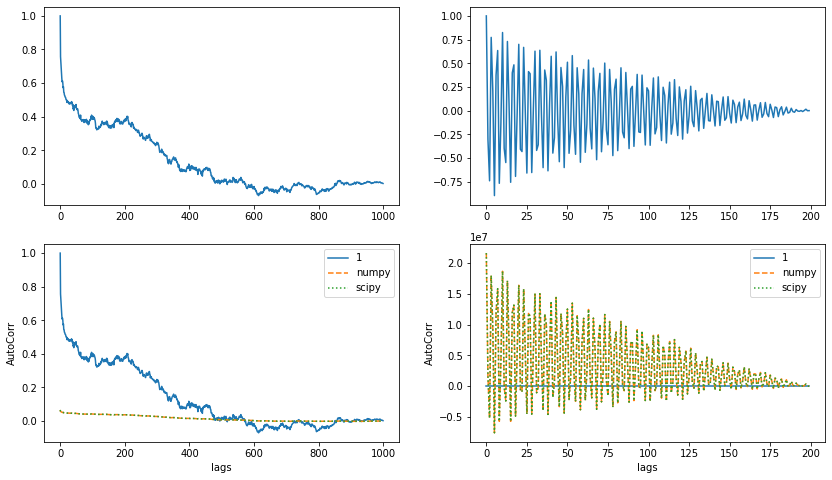

In [2]:
def Autocorrelation2(x):
    """
    copied from: https://www.alanzucconi.com/2016/06/06/autocorrelation-function/#part3
    """
    mean = numpy.mean(x)
    autocorrelation = numpy.zeros(int(x.size/2))
    for t in range(autocorrelation.size):
        n = 0 # Numerator
        d = 0 # Denominator
        for i in range(x.size):
            xim = x[i] - mean
            n += xim * (x[(i + t) % x.size] - mean)
            d += xim * xim
        autocorrelation[t] = n / d
    return autocorrelation


def calc_AutoCorr(x):
    """
    calcula o coeficiente de correlação de acordo com a definição de
    Chialvo et al 2020 Scientific RepoRtS 10:12145 - https://doi.org/10.1038/s41598-020-69154-0
    Ver material suplementar

    x -> dados da serie temporal da magnetizacao

    https://www.itl.nist.gov/div898/handbook/eda/section3/eda35c.htm

    
    https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlate.html#scipy.signal.correlate
    https://numpy.org/doc/stable/reference/generated/numpy.correlate.html


    dados teste: https://www.itl.nist.gov/div898/handbook/eda/section3/autocopl.htm
 
    """
    C    = numpy.zeros(x.size) # use int(x.size/2) for equavalence with 'same' in numpy.correlate, or this for equivalence with 'full'
    xm   = numpy.mean(x)
    xv   = numpy.var(x)
    xpad = numpy.zeros(x.size + 2*C.size)
    xpad[C.size:(C.size+x.size)] = x
    for tau in range(C.size):
        ############# option 1
        #for t in range(tau,x.size):
        #    C[tau] += (x[t]-xm)*(x[t-tau]-xm)
        #C[tau] /= (x.size - tau)*xv
        ############# option 2 (equivalent to option 1) -- this approximately matches the implementation of AutoCorrelation2
        #C[tau] = numpy.mean((x[:(x.size-tau)] - xm)*(x[tau:] - xm)) / xv
        ############# option 3
        #C[tau] = numpy.mean(x[:(x.size-tau)]*x[tau:])/xv
        ############# option 4
        #C[tau] = numpy.mean(xpad[C.size:(C.size+x.size)]*xpad[(C.size+tau):(C.size+x.size+tau)])/xv
        ############# option 5 -- this is the implementation that matches both numpy.correlate and scipy.signal.correlate
        #C[tau] = numpy.dot(xpad[C.size:(C.size+x.size)],xpad[(C.size+tau):(C.size+x.size+tau)])
        ############# option 6
        #C[tau] = numpy.dot(xpad[C.size:(C.size+x.size)]-xm,xpad[(C.size+tau):(C.size+x.size+tau)]-xm)/xv
        ############# option 7 -- this is the normalized standard autocorrelation function
        C[tau] = numpy.mean((xpad[C.size:(C.size+x.size)]-xm)*(xpad[(C.size+tau):(C.size+x.size+tau)]-xm))/xv
    return C

get_from_max_on = lambda C: C[numpy.argmax(C):]
normalize       = lambda C: C/numpy.max(C)
lags            = lambda C: numpy.arange(C.size)

C_fl   = calc_AutoCorr(data_flicker)
C_lw   = calc_AutoCorr(data_lew)
C_fl2  = Autocorrelation2(data_flicker)
C_lw2  = Autocorrelation2(data_lew)
C_fl_n = get_from_max_on(       numpy.correlate(data_flicker,data_flicker ,'full'))
C_lw_n = get_from_max_on(       numpy.correlate(data_lew    ,data_lew     ,'full'))
C_fl_s = get_from_max_on(scipy.signal.correlate(data_flicker,data_flicker ,'full'))
C_lw_s = get_from_max_on(scipy.signal.correlate(data_lew    ,data_lew     ,'full'))


fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(14,8))

ax[0,0].plot(lags(C_fl  ), C_fl  , '-' ,label='1')
ax[0,1].plot(lags(C_lw  ), C_lw  , '-' ,label='1')
#ax[0,0].plot(lags(C_fl2 ), C_fl2 , '-' ,label='2')
#ax[0,1].plot(lags(C_lw2 ), C_lw2 , '-' ,label='2')


ax[1,0].plot(lags(C_fl  ), C_fl  , '-' ,label='1')
#ax[1,0].plot(lags(C_fl2 ), C_fl2 , '-' ,label='2')
ax[1,0].plot(lags(C_fl_n), C_fl_n, '--',label='numpy')
ax[1,0].plot(lags(C_fl_s), C_fl_s, ':' ,label='scipy')

ax[1,1].plot(lags(C_lw  ), C_lw  , '-' ,label='1')
#ax[1,1].plot(lags(C_lw2 ), C_lw2 , '-' ,label='2')
ax[1,1].plot(lags(C_lw_n), C_lw_n, '--',label='numpy')
ax[1,1].plot(lags(C_lw_s), C_lw_s, ':' ,label='scipy')

ax[1,0].set_xlabel('lags')
ax[1,0].set_ylabel('AutoCorr')
ax[1,1].set_xlabel('lags')
ax[1,1].set_ylabel('AutoCorr')
ax[1,0].legend()
ax[1,1].legend()

plt.show()

In [9]:
print('max   =',numpy.max(numpy.correlate(data_flicker,data_flicker,'full')))
print('valid =',numpy.max(numpy.correlate(data_flicker,data_flicker,'valid')))

max   = 0.06581682824799998
valid = 0.06581682824799998


In [16]:
import sys
del sys.modules['modules.SimulacaoKTz']
del simktz
import modules.SimulacaoKTz as simktz

print('normalized flicker at lag=0 (from full calc)  -> ',simktz.calc_AutoCorr(    data_flicker,    True)[0])
print('normalized flicker at lag=0 (from single lag) -> ',simktz.calc_AutoCorr_lag(data_flicker, 0, True))
print('normalized lew at lag=0 (from full calc)  -> ',simktz.calc_AutoCorr(    data_lew    ,    True)[0])
print('normalized lew at lag=0 (from single lag) -> ',simktz.calc_AutoCorr_lag(data_lew    , 0, True))

print('flicker at lag=0 (from full calc)  -> ',simktz.calc_AutoCorr(    data_flicker,    False)[0])
print('flicker at lag=0 (from single lag) -> ',simktz.calc_AutoCorr_lag(data_flicker, 0, False))
print('lew at lag=0 (from full calc)  -> ',simktz.calc_AutoCorr(    data_lew    ,    False)[0])
print('lew at lag=0 (from single lag) -> ',simktz.calc_AutoCorr_lag(data_lew    , 0, False))

normalized flicker at lag=0 (from full calc)  ->  1.0
normalized flicker at lag=0 (from single lag) ->  1.0
normalized lew at lag=0 (from full calc)  ->  1.0
normalized lew at lag=0 (from single lag) ->  1.0
flicker at lag=0 (from full calc)  ->  0.06581682824799998
flicker at lag=0 (from single lag) ->  0.06581682824799998
lew at lag=0 (from full calc)  ->  21602349.0
lew at lag=0 (from single lag) ->  21602349.0
